In [2]:
%pylab inline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import sklearn
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=genfromtxt('wine.dat',delimiter=',')
X=data[:,1:]
Y=data[:,0]
n=30
score=zeros(n)
score2=zeros(n)
X=sklearn.preprocessing.normalize(X)

for i,j in zip(logspace(0,2,n),range(n)):
    numClusters=int(i+1)
    Kclusters=KMeans(n_clusters=numClusters)
    Kclusters.fit(X,Y)
    groups=Kclusters.predict(X)
    
    score2[j]=Kclusters.score(X)
    '''conversion=sklearn.linear_model.LogisticRegression()
    conversion.fit(transpose([groups]),Y)
    score[j]=conversion.score(transpose([predicted]),Y)'''
    
    for i in range(numClusters):
        T=Y[Kclusters.labels_==i]
        score[j]+=st.mode(T)[1]
        #A cada cluster le corresponde un tipo de vino, dependiendo de cual sea el tipo más comun dentro de ese cluster.
        #De este modo los elementos que correspondan con la moda del cluster estan bien clasificados por lo tanto
        #lo usamos como metrica de la efectividad del algoritmo
    

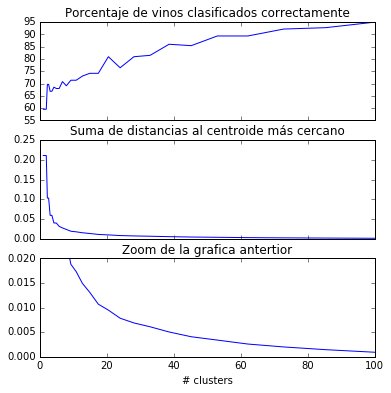

In [4]:
correctos=100.0*score/len(X)
f,ax=subplots(3,1,sharex=True,figsize=(6,6))

ax[0].plot(logspace(0,2,n),correctos)
ax[0].set_title('Porcentaje de vinos clasificados correctamente')


ax[1].plot(logspace(0,2,n),-score2)
ax[1].set_title('Suma de distancias al centroide más cercano')

ax[2].plot(logspace(0,2,n),-score2)
ax[2].set_title('Zoom de la grafica antertior')
ylim([0,0.02])
xlabel('# clusters')

Podemos ver que el método no converge con el numero de clusters. Se estabiliza ligeramente con alrededor de 10 clusters, por lo que ese puede ser un numero util de clusters, sin embargo el desempeño sigue sin ser muy bueno y no hay ningun numero que sea evidentemente optimo.

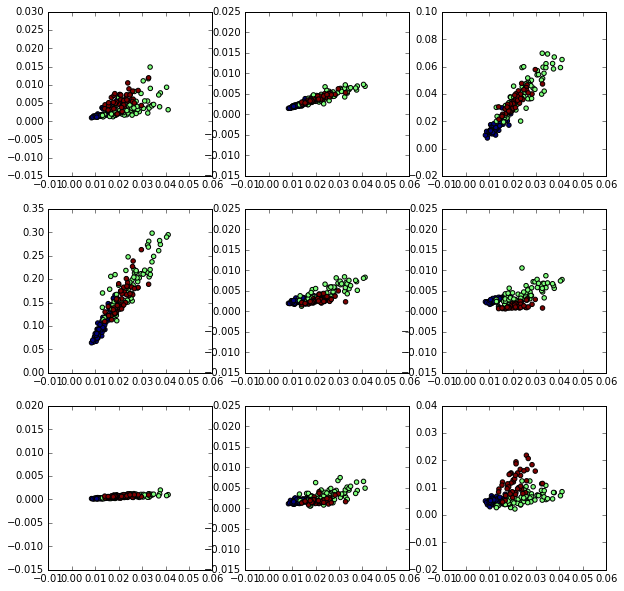

In [5]:

fig,ax=subplots(3,3,figsize=(10, 10))

n=1
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X[:,0],X[:,n],c=Y)
        n+=1


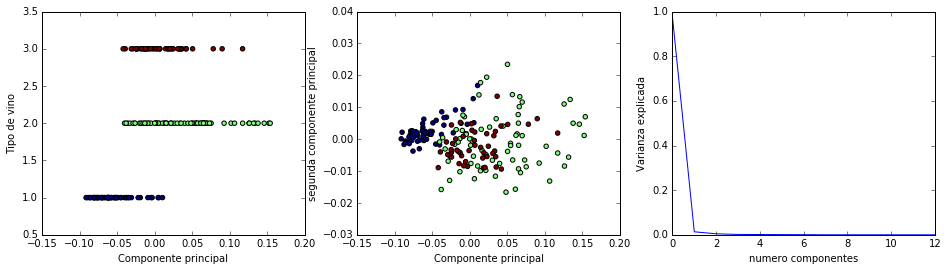

In [16]:
Xnorm=sklearn.preprocessing.normalize(X)
pca=sklearn.decomposition.PCA()
pca.fit(Xnorm)

fig,ax=subplots(1,3,figsize=(16, 4))
ax[0].scatter(pca.transform(X)[:,0],Y,c=Y)
ax[0].set_xlabel('Componente principal')
ax[0].set_ylabel('Tipo de vino')
ax[1].scatter(pca.transform(X)[:,0],pca.transform(X)[:,1],c=Y)
ax[1].set_xlabel('Componente principal')
ax[1].set_ylabel('segunda componente principal')

ax[2].plot(pca.explained_variance_ratio_)
xlabel('numero componentes')
ylabel('Varianza explicada')

Con un unico componente se logra explicar casi toda la varianza. Sin embargo incluso con esta separacion en componentes principales, los diferentes tipos de vino se sobrelapan especialmente en el rango de -0.05 a 0.05 en la componente principal. Esto se ve un poco mejor en la figura del medio donde se grafican las dos componentes principales. Si bien se puede distinguir un partron, los componentes principales no separan a los puntos verdes de los rojos. Esto significa que PCA no resulta especialmente util para distinguir entre los distintos tipos de vino y clasificarlos.

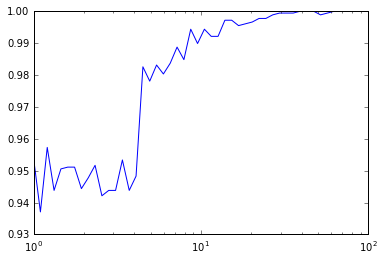

In [85]:
n=50
N=10
treesScore=zeros(n)

for k in range(N):
    for i,j in zip(logspace(0,1.5,n),range(n)):
        rf = RandomForestClassifier(n_estimators=int(i))
        rf.fit(X,Y)
        treesScore[j]+=rf.score(X,Y)*1.0/N
    
plot(logspace(0,2,n),treesScore)
xscale('log')

Se ve un salto notable cuando se pasa de 4 a 5 arboles para realizar la clasificacion. Si bien el resultado sigue mejorando, usar mas arboles no produce un aumento muy grande en el desempeño, de modo que se concluye que es optimo usar 5 arboles.
Adicionalmente, el porcentaje de elementos clasificados correctamente es mucho mayor que para los demas algoritmos. En conclusion se puede decir que 